In [46]:
# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de tests y entrenamiento
from sklearn.model_selection import train_test_split

# Modelos
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Preprocessing: Label encoding
from sklearn import preprocessing

# R2 score
from sklearn.metrics import r2_score

# MSE
from sklearn.metrics import mean_squared_error

# MAE
from sklearn.metrics import mean_absolute_error

# Biblioteca para trabajar con JSON
import json

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Pickle
import pickle

import warnings
warnings.filterwarnings("ignore")

## Import Data through a CSV file

### Set path

In [9]:
path = '../final.csv'

In [10]:
df = pd.read_csv(path)

### Features

Features:

- 

Target variable:
- 

## Exploring dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20290 entries, 0 to 20289
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20290 non-null  int64  
 1   year         20290 non-null  int64  
 2   genre        20290 non-null  object 
 3   director     20290 non-null  object 
 4   budget       4033 non-null   float64
 5   country      20290 non-null  object 
 6   runtime      20044 non-null  float64
 7   main_cast_1  20290 non-null  object 
 8   main_cast_2  20290 non-null  object 
 9   main_cast_3  20290 non-null  object 
 10  ratings      20290 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.7+ MB


In [12]:
df.head()

,id,year,genre,director,budget,country,runtime,main_cast_1,main_cast_2,main_cast_3,ratings
0,9,1995,Action,Peter Hyams,35000000.0,US,106.0,Blanche Bayliss,William Courtenay,Chauncey Depew,5.95
1,121,1992,Drama,John N. Smith,NaN,CA,93.0,Julie Seale,Fred Storey,Ellen Daws,8.24
2,165,1995,Action,John McTiernan,90000000.0,US,128.0,José Amigo,Antonio Fino,Antonio Masia,7.26
3,230,1995,Drama,Taylor Hackford,NaN,US,132.0,Bleuette Bernon,Carmelli,Dupeyron,7.72
4,247,1994,Crime,Peter Jackson,5000000.0,NZ,109.0,Herbert Beerbohm Tree,S.A. Cookson,Dora Tulloch,7.96


### Visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Rating

<AxesSubplot:xlabel='ratings', ylabel='Density'>

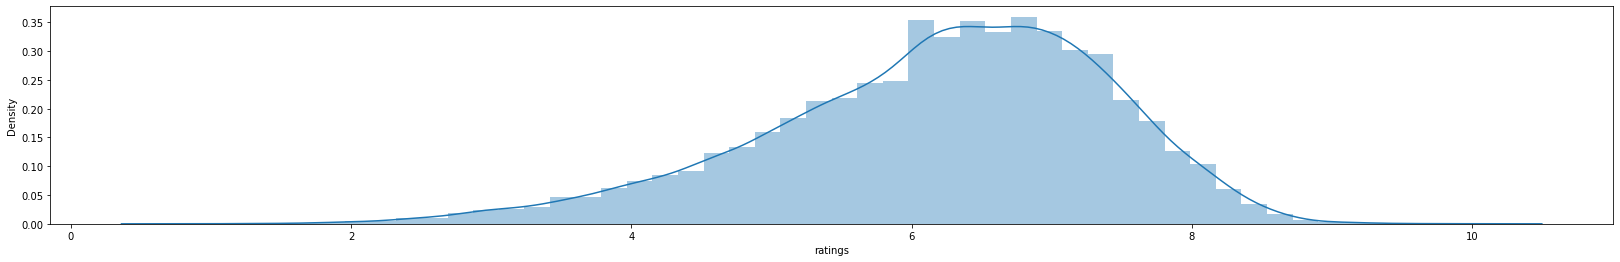

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(28, 4))
sns.distplot(df['ratings'].dropna(), ax = axes)

### Year and Budget

<AxesSubplot:xlabel='budget', ylabel='Density'>

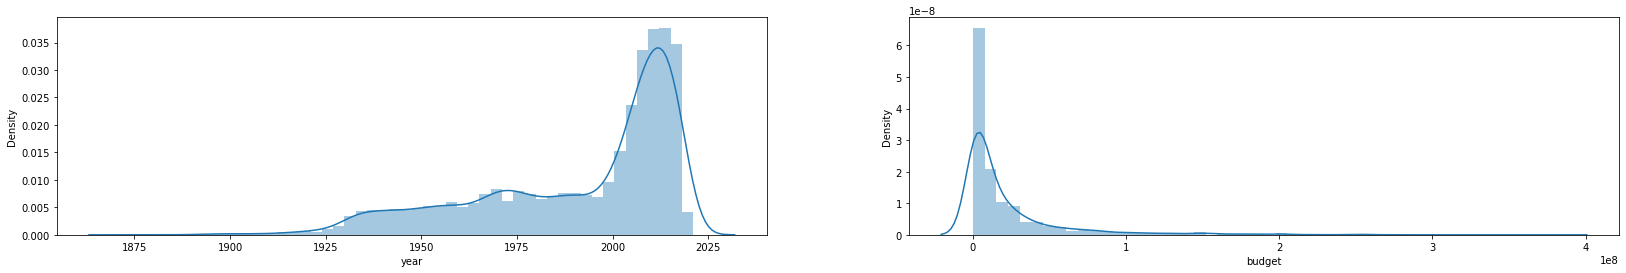

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))
sns.distplot(df['year'].dropna(), ax = axes[0])
sns.distplot(df['budget'].dropna(), ax = axes[1])

## Preprocessing data

In [16]:
df.head()

,id,year,genre,director,budget,country,runtime,main_cast_1,main_cast_2,main_cast_3,ratings
0,9,1995,Action,Peter Hyams,35000000.0,US,106.0,Blanche Bayliss,William Courtenay,Chauncey Depew,5.95
1,121,1992,Drama,John N. Smith,NaN,CA,93.0,Julie Seale,Fred Storey,Ellen Daws,8.24
2,165,1995,Action,John McTiernan,90000000.0,US,128.0,José Amigo,Antonio Fino,Antonio Masia,7.26
3,230,1995,Drama,Taylor Hackford,NaN,US,132.0,Bleuette Bernon,Carmelli,Dupeyron,7.72
4,247,1994,Crime,Peter Jackson,5000000.0,NZ,109.0,Herbert Beerbohm Tree,S.A. Cookson,Dora Tulloch,7.96


### Process 01: Delete columns

In [17]:
columns = ["id"]
df.drop(columns, axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20290 entries, 0 to 20289
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         20290 non-null  int64  
 1   genre        20290 non-null  object 
 2   director     20290 non-null  object 
 3   budget       4033 non-null   float64
 4   country      20290 non-null  object 
 5   runtime      20044 non-null  float64
 6   main_cast_1  20290 non-null  object 
 7   main_cast_2  20290 non-null  object 
 8   main_cast_3  20290 non-null  object 
 9   ratings      20290 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [19]:
df.head()

,year,genre,director,budget,country,runtime,main_cast_1,main_cast_2,main_cast_3,ratings
0,1995,Action,Peter Hyams,35000000.0,US,106.0,Blanche Bayliss,William Courtenay,Chauncey Depew,5.95
1,1992,Drama,John N. Smith,NaN,CA,93.0,Julie Seale,Fred Storey,Ellen Daws,8.24
2,1995,Action,John McTiernan,90000000.0,US,128.0,José Amigo,Antonio Fino,Antonio Masia,7.26
3,1995,Drama,Taylor Hackford,NaN,US,132.0,Bleuette Bernon,Carmelli,Dupeyron,7.72
4,1994,Crime,Peter Jackson,5000000.0,NZ,109.0,Herbert Beerbohm Tree,S.A. Cookson,Dora Tulloch,7.96


## Process 02: Encode data

In [20]:
def encodeColumns(df, columns):
    le = preprocessing.LabelEncoder()
    for column in columns:
        le.fit(df[column])
        # TODO: Guardar en Pickle  encodes/encode_column.pickle  ---> le.classes_
        # TODO: El backend debe devolver la lista le.clasess_
        df[column] = le.transform(df[column])
        
columnsToEncode = ['genre', 'director', 'country', 'main_cast_1', 'main_cast_2', 'main_cast_3']
encodeColumns(df, columnsToEncode)

In [21]:
df.head()

,year,genre,director,budget,country,runtime,main_cast_1,main_cast_2,main_cast_3,ratings
0,1995,0,8143,35000000.0,129,106.0,2182,19115,2939,5.95
1,1992,7,5120,NaN,24,93.0,9669,5980,5012,8.24
2,1995,0,5111,90000000.0,129,128.0,9438,1228,1242,7.26
3,1995,7,10029,NaN,129,132.0,2194,2624,4619,7.72
4,1994,5,8145,5000000.0,95,109.0,7325,16372,4479,7.96


## Process 03: Missing data

In [22]:
# TODO: Decidir estrategias
si = SimpleImputer(
    missing_values = np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy = 'median',  # strategies:  
    #fill_value=0,  # la constante que se usará para completar los valores faltantes es un int64 = 0
    verbose=0,
    copy=True
)

In [23]:
print("Null values before transformation: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Null values before transformation: 

year               0
genre              0
director           0
budget         16257
country            0
runtime          246
main_cast_1        0
main_cast_2        0
main_cast_3        0
ratings            0
dtype: int64



In [24]:
si.fit( X = df)

SimpleImputer(strategy='median')

In [25]:
# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df = pd.DataFrame.from_records(data = si.transform(X = df), columns = df.columns)

In [26]:
print("Null values after transformation: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Null values after transformation: 

year           0
genre          0
director       0
budget         0
country        0
runtime        0
main_cast_1    0
main_cast_2    0
main_cast_3    0
ratings        0
dtype: int64



## Training

### Define features and target

In [27]:
limitedColumns = ['year', 'genre', 'director', 'country', 'main_cast_1', 'main_cast_2', 'main_cast_3']

In [28]:
def limitColumns(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], downcast='integer')

limitColumns(df, limitedColumns)

In [29]:
df.head()

,year,genre,director,budget,country,runtime,main_cast_1,main_cast_2,main_cast_3,ratings
0,1995,0,8143,35000000.0,129,106.0,2182,19115,2939,5.95
1,1992,7,5120,7750000.0,24,93.0,9669,5980,5012,8.24
2,1995,0,5111,90000000.0,129,128.0,9438,1228,1242,7.26
3,1995,7,10029,7750000.0,129,132.0,2194,2624,4619,7.72
4,1994,5,8145,5000000.0,95,109.0,7325,16372,4479,7.96


In [30]:
features = ["year", "genre", "director", "main_cast_1", "main_cast_2", "main_cast_3", "budget", "country", "runtime"]
target = ["ratings"]

X = df[features]
y = df[target]

### Splitting data: Train and Test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

In [32]:
X_train.head()

,year,genre,director,main_cast_1,main_cast_2,main_cast_3,budget,country,runtime
2275,2005,7,4287,12322,9112,9765,7750000.0,46,107.0
5954,2009,7,3115,12861,9497,16527,20000000.0,30,134.0
8610,2012,7,2766,9944,16964,10747,7750000.0,46,90.0
6696,1933,4,3913,7711,13228,8414,7750000.0,129,97.0
17927,1959,14,10614,15811,10740,2614,7750000.0,129,73.0


In [33]:
y_train.head()

,ratings
2275,7.27
5954,7.24
8610,6.88
6696,6.33
17927,3.72


### Model: ElasticNet

In [34]:
elasticModel = ElasticNet(random_state = 0)

In [35]:
elasticModel.fit(X_train, y_train.values.ravel())

ElasticNet(random_state=0)

In [36]:
elastic_predicted = elasticModel.predict(X_test)

In [37]:
print("MSE:", mean_squared_error(y_test, elastic_predicted))
print("MAE:", mean_absolute_error(y_test, elastic_predicted))
print("R2 score:", r2_score(y_test, elastic_predicted))

MSE: 1.4113709183221579
MAE: 0.9487357186547637
R2 score: 0.03528801683668237


### Model: Lasso

In [38]:
lassoModel = linear_model.Lasso(alpha = 0.1)

In [39]:
lassoModel.fit(X_train, y_train.values.ravel())

Lasso(alpha=0.1)

In [40]:
lasso_predicted = lassoModel.predict(X_test)

In [41]:
print("MSE:", mean_squared_error(y_test, lasso_predicted))
print("MAE:", mean_absolute_error(y_test, lasso_predicted))
print("R2 score:", r2_score(y_test, lasso_predicted))

MSE: 1.4113603342238266
MAE: 0.9485731741982717
R2 score: 0.03529525136756195


### Model: SGD Regresión

In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgdModel = SGDRegressor(max_iter = 1000, tol=1e-3)
sgdModel.fit(X_train, y_train.values.ravel())

SGDRegressor()

In [43]:
sgd_y_predicted = sgdModel.predict(X_test)

In [44]:
print("MSE:", mean_squared_error(y_test, sgd_y_predicted))
print("MAE:", mean_absolute_error(y_test, sgd_y_predicted))
print("R2 score:", r2_score(y_test, sgd_y_predicted))

MSE: 6.379965376641347e+46
MAE: 1.3698361372386399e+23
R2 score: -4.3608869724550197e+46


In [49]:
# Mandar los modelos a un archivo binario con pickle y levantar el backend con eso.
# Se utiliza solo ElasticNet y Lasso porque tienen un mejor desempeño
with open("elasticModel.p", "wb") as f:
    pickle.dump(elasticModel, f)
    
with open("lassomodel.p", "wb") as f:
    pickle.dump(lassoModel, f)